In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv("Data-Collisions.csv")
df.head(5)

C:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.shape

(194673, 38)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [6]:
a=df[df['SEVERITYCODE']== 1].count()['SEVERITYCODE']
a

136485

In [7]:
b=df[df['SEVERITYCODE']== 2].count()['SEVERITYCODE']
b

58188

In [8]:
import seaborn as sns

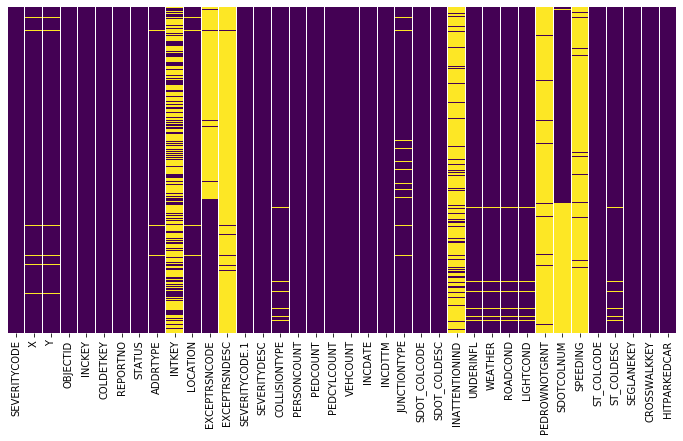

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
df.drop(['SPEEDING','SDOTCOLNUM','PEDROWNOTGRNT','INATTENTIONIND'
                    ,'EXCEPTRSNDESC','EXCEPTRSNCODE', 'INTKEY'],axis=1,inplace=True)

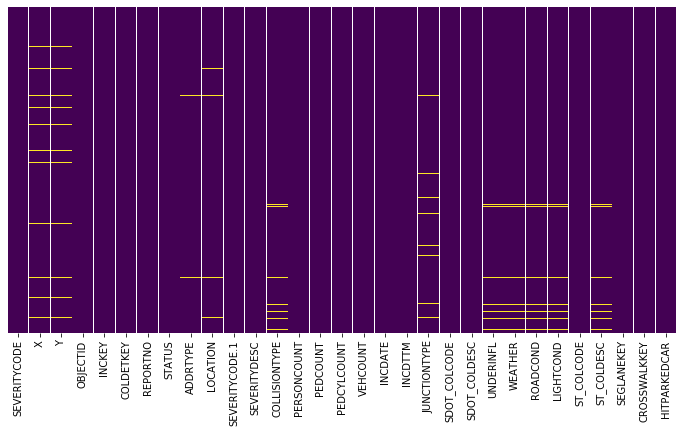

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
data_collision=df.dropna()

MemoryError: Unable to allocate 170. MiB for an array with shape (5582077, 4) and data type float64

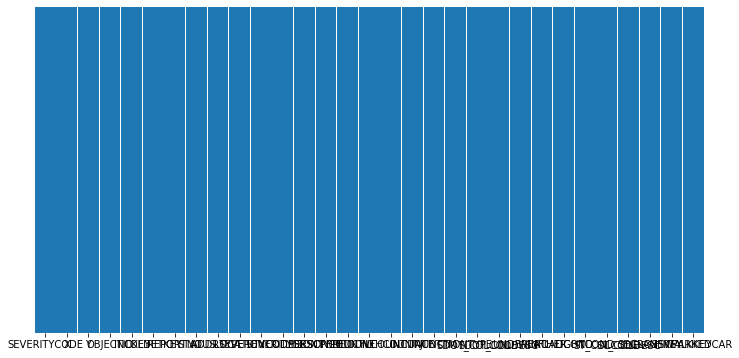

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(data_collision.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
data_collision.shape

(180067, 31)

In [15]:
data_collision['INCDATE'] = pd.to_datetime(data_collision['INCDATE'])
data_collision['Hour'] = data_collision['INCDATE'].apply(lambda time: time.hour)
data_collision['Month'] = data_collision['INCDATE'].apply(lambda time: time.month)
data_collision['Day of Week'] = data_collision['INCDATE'].apply(lambda time: time.dayofweek)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [16]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data_collision['Day of Week'] = data_collision['Day of Week'].map(dmap)


C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


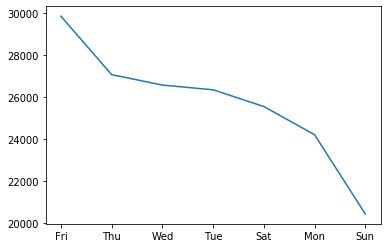

In [17]:
data_collision['Day of Week'].value_counts().plot(kind = 'line')

In [18]:
data_collision.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'Hour',
       'Month', 'Day of Week'],
      dtype='object')

Text(0.5, 1.0, 'Top 10 Weather Conditions for Road Traffic Accidents')

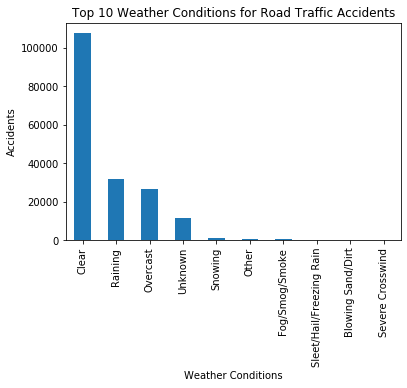

In [19]:
fig, ax=plt.subplots()
data_collision['WEATHER'].value_counts().sort_values(ascending=False).head(10).plot.bar(width=0.5, align='center')
plt.xlabel('Weather Conditions')
plt.ylabel('Accidents')
ax.tick_params()
plt.title('Top 10 Weather Conditions for Road Traffic Accidents')


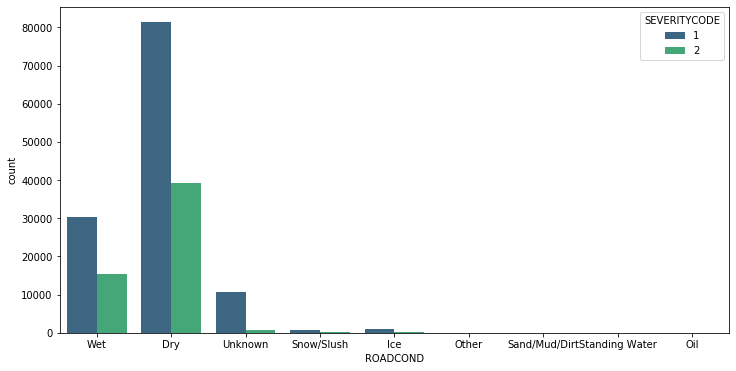

In [20]:
plt.figure(figsize = (12,6))
sns.countplot(x ='ROADCOND', data = data_collision , 
              hue = 'SEVERITYCODE', palette = 'viridis')

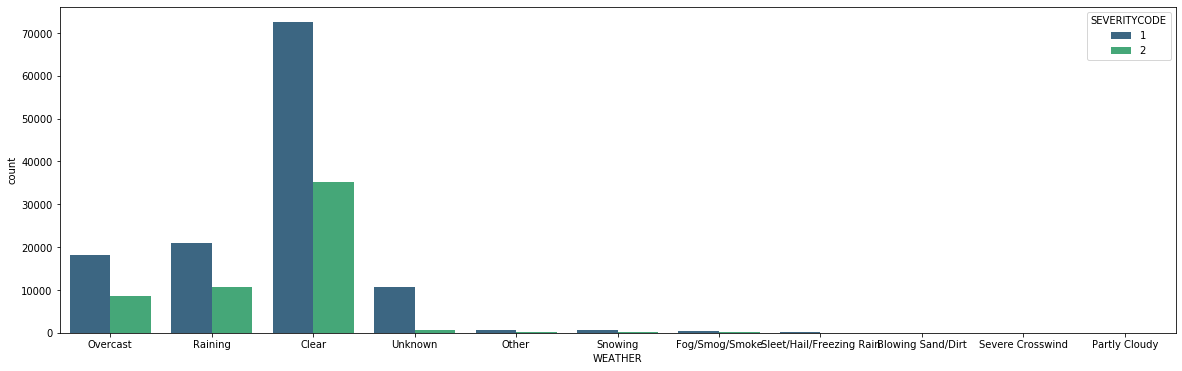

In [21]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'WEATHER', data = data_collision , 
              hue = 'SEVERITYCODE', palette = 'viridis')

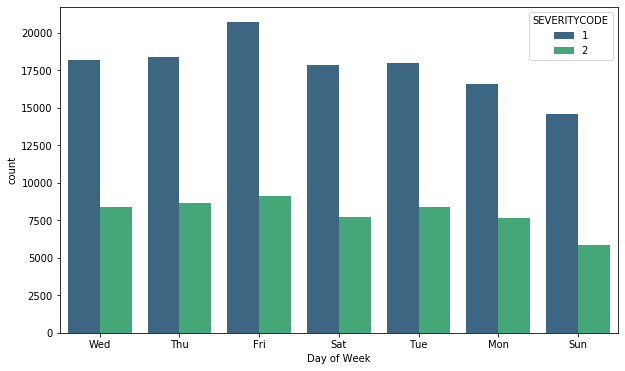

In [22]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'Day of Week', data = data_collision , 
              hue = 'SEVERITYCODE', palette = 'viridis')

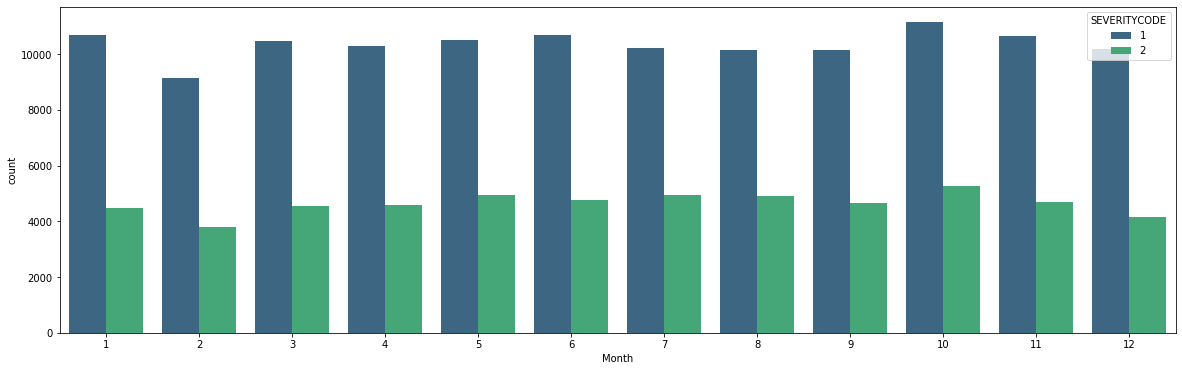

In [23]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'Month', data = data_collision , 
              hue = 'SEVERITYCODE', palette = 'viridis')

In [24]:
data_collision['Total'] = data_collision['INCKEY'].count()

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


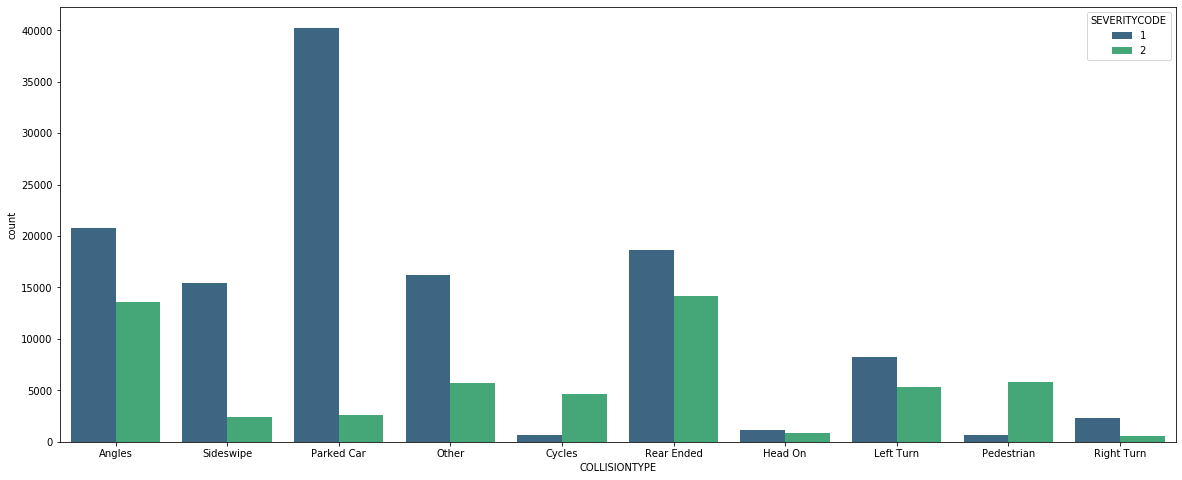

In [25]:
plt.figure(figsize = (20,8))
sns.countplot(x = 'COLLISIONTYPE', data = data_collision , 
              hue = 'SEVERITYCODE', palette = 'viridis')

[(-1, 9)]

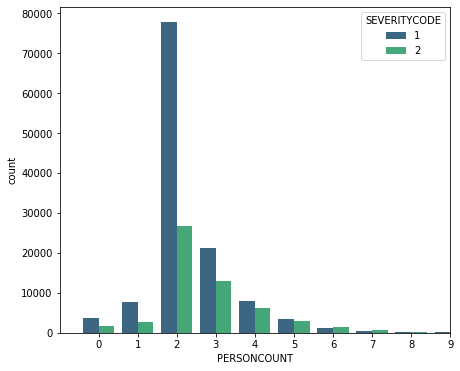

In [26]:
plt.figure(figsize = (7,6))
set = sns.countplot(x = 'PERSONCOUNT', data = data_collision , 
              hue = 'SEVERITYCODE', palette = 'viridis')
set.set(xlim=(-1,9))

In [27]:
data_collision.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'Hour',
       'Month', 'Day of Week', 'Total'],
      dtype='object')

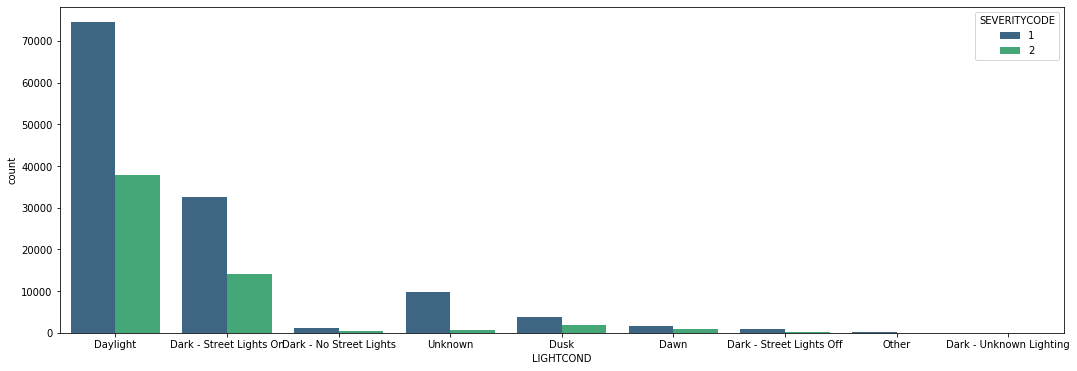

In [28]:
plt.figure(figsize = (18,6))
set = sns.countplot(x = 'LIGHTCOND', data = data_collision , 
              hue = 'SEVERITYCODE', palette = 'viridis')

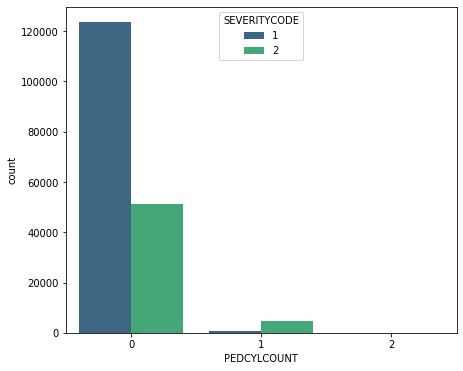

In [29]:
plt.figure(figsize = (7,6))
set = sns.countplot(x = 'PEDCYLCOUNT', data = data_collision , 
              hue = 'SEVERITYCODE', palette = 'viridis')

[(0, 6)]

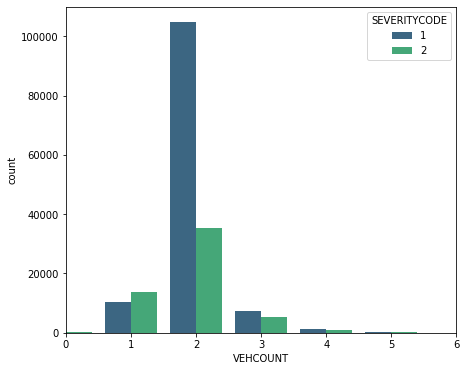

In [30]:
plt.figure(figsize = (7,6))
set = sns.countplot(x = 'VEHCOUNT', data = data_collision , 
              hue = 'SEVERITYCODE', palette = 'viridis')
set.set(xlim=(0,6))

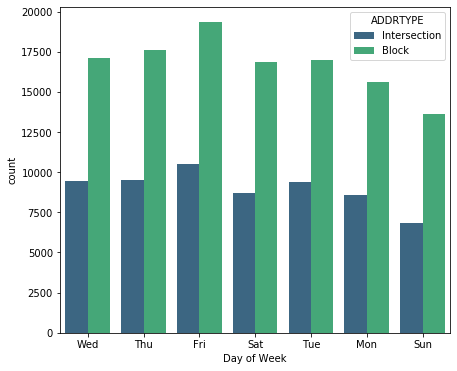

In [31]:
plt.figure(figsize = (7,6))
set = sns.countplot(x = 'Day of Week', data = data_collision , 
              hue = 'ADDRTYPE', palette = 'viridis')


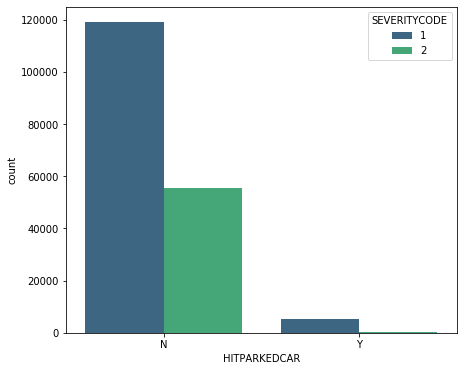

In [32]:
plt.figure(figsize = (7,6))
set = sns.countplot(x = 'HITPARKEDCAR', data = data_collision , 
              hue = 'SEVERITYCODE', palette = 'viridis')

In [33]:
data_collision.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'Hour',
       'Month', 'Day of Week', 'Total'],
      dtype='object')

In [34]:
df1 =data_collision[['SEVERITYCODE','Month', 'Day of Week','COLLISIONTYPE', 'PERSONCOUNT', 
          'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'ADDRTYPE','LIGHTCOND','WEATHER', 'ROADCOND',
          'HITPARKEDCAR']]

In [35]:
df1.head()

,SEVERITYCODE,Month,Day of Week,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,ADDRTYPE,LIGHTCOND,WEATHER,ROADCOND,HITPARKEDCAR
0,2,3,Wed,Angles,2,0,0,2,Intersection,Daylight,Overcast,Wet,N
1,1,12,Wed,Sideswipe,2,0,0,2,Block,Dark - Street Lights On,Raining,Wet,N
2,1,11,Thu,Parked Car,4,0,0,3,Block,Daylight,Overcast,Dry,N
3,1,3,Fri,Other,3,0,0,3,Block,Daylight,Clear,Dry,N
4,2,1,Wed,Angles,2,0,0,2,Intersection,Daylight,Raining,Wet,N


In [36]:
dmap_day = {'Mon':1,'Tue':2,'Wed':3,'Thu':4,'Fri':5, 'Sat':6,'Sun':7}

In [37]:
df1['Day of Week'] = data_collision['Day of Week'].map(dmap_day)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
dmap_collision = {'Parked Car':1,'Angles':2,'Rear Ended':3,'Other':4,'Sideswipe':5, 
                  'Left Turn':6,'Left Turn':7, 'Pedestrian':8, 'Cycles':9, 'Right Turn': 10,
                 'Head On': 11}

df1['COLLISIONTYPE'] =df1['COLLISIONTYPE'].map(dmap_collision)
dmap_address = {'Block':1,'Intersection':2}

df1['ADDRTYPE'] =df1['ADDRTYPE'].map(dmap_address)
df1['ADDRTYPE'].value_counts()

C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1    117085
2     62982
Name: ADDRTYPE, dtype: int64

In [39]:
dmap_light = {'Daylight':1,'Dark - Street Lights On':2,'Unknown':3,'Dusk':4,'Dawn':5, 
                  'Dark - No Street Lights':6,'Dark - Street Lights Off':7, 
              'Other':8, 'Dark - Unknown Lighting':9}

df1['LIGHTCOND'] =df1['LIGHTCOND'].map(dmap_light)
df1['WEATHER'].value_counts()

C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Clear                       107692
Raining                      31719
Overcast                     26809
Unknown                      11505
Snowing                        875
Other                          728
Fog/Smog/Smoke                 549
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                24
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [40]:
dmap_weather = {'Clear':1,'Raining':2,'Overcast':3,'Unknown':4,'Snowing':5, 
                  'Other':6,'Fog/Smog/Smoke':7, 
              'Sleet/Hail/Freezing Rain':8, 'Blowing Sand/Dirt':9, 'Severe Crosswind':10,
               'Partly Cloudy': 11}

df1['WEATHER'] = df1['WEATHER'].map(dmap_weather)
dmap_roadcond = {'Dry':1,'Wet':2,'Unknown':3,'Ice':4,'Snow/Slush':5, 
                  'Other':6,'Standing Water':7, 
              'Sand/Mud/Dirt':8, 'Oil': 9}

df1['ROADCOND'] = df1['ROADCOND'].map(dmap_roadcond)
dmap_hitcar = {'N':1,'Y':2}

df1['HITPARKEDCAR'] = df1['HITPARKEDCAR'].map(dmap_hitcar)


C:\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [41]:
df1.head()

,SEVERITYCODE,Month,Day of Week,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,ADDRTYPE,LIGHTCOND,WEATHER,ROADCOND,HITPARKEDCAR
0,2,3,3,2,2,0,0,2,2,1,3,2,1
1,1,12,3,5,2,0,0,2,1,2,2,2,1
2,1,11,4,1,4,0,0,3,1,1,3,1,1
3,1,3,5,4,3,0,0,3,1,1,1,1,1
4,2,1,3,2,2,0,0,2,2,1,2,2,1


In [42]:
df1.columns

Index(['SEVERITYCODE', 'Month', 'Day of Week', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'ADDRTYPE', 'LIGHTCOND',
       'WEATHER', 'ROADCOND', 'HITPARKEDCAR'],
      dtype='object')

In [43]:
from sklearn.model_selection import train_test_split

ImportError: cannot import name '__check_build' from 'sklearn' (C:\anaconda\lib\site-packages\sklearn\__init__.py)

In [44]:
X =df1[['Month', 'Day of Week', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'ADDRTYPE', 'LIGHTCOND',
       'WEATHER', 'ROADCOND', 'HITPARKEDCAR']]
y =df1['SEVERITYCODE']


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

NameError: name 'train_test_split' is not defined

In [46]:
from sklearn.linear_model import LogisticRegression

ImportError: cannot import name '__check_build' from 'sklearn' (C:\anaconda\lib\site-packages\sklearn\__init__.py)

In [47]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

NameError: name 'LogisticRegression' is not defined

In [48]:
predictions = logmodel.predict(X_test)

NameError: name 'logmodel' is not defined